<a href="https://colab.research.google.com/github/TheSupremeTaco/Ancestry_Linear_Reg/blob/main/DeepLearning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
class1 = pd.read_csv("Class1.txt")
class2 = pd.read_csv("Class2.txt")
print(class1.shape)
print(class2.shape)
class1.head()

(100, 2)
(100, 2)


,weight,height
0,0.132,0.757
1,0.722,0.888
2,0.095,0.804
3,0.633,0.530
4,0.472,0.701


In [3]:
# add lables to the data. .insert() will directly modify the dataframe
posLabel=1          # positive class Label
negLabel=-1         # negative class label
T=(posLabel+negLabel)/2 # This is the threshold to classify positive vs. negative

class1.insert(class1.shape[1],'label',posLabel)
class2.insert(class2.shape[1],'label',negLabel)
# combine both datasets as one
class12 = class1.append(class2)
print(class12.shape)
class12.head()

(200, 3)


,weight,height,label
0,0.132,0.757,1
1,0.722,0.888,1
2,0.095,0.804,1
3,0.633,0.530,1
4,0.472,0.701,1


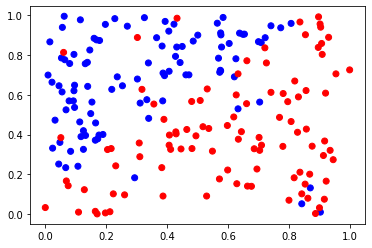

In [4]:
colors=["red","black","blue","green"]
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx+1] for idx in class12.iloc[:,2]])
# The dataset is not a linearly searable problem.
# So we will use gradient descent learning to learn decision boundary

In [18]:
# partitioning the dataset into training vs. test sets
# shuffle the data
class12_rand=shuffle(class12)
features,labels=class12_rand.iloc[:,0:-1],class12_rand.loc[:,['label']]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2, random_state=42)

# covert data from dataframe into matrix format for arithemetic calculation
X_train_m=np.asmatrix(X_train, dtype = 'float64')
X_test_m=np.asmatrix(X_test, dtype = 'float64')
y_train_m=np.asmatrix(y_train, dtype = 'float64')
y_test_m=np.asmatrix(y_test, dtype = 'float64')

In [8]:
def GradientDescentLearning(features, labels, max_iter, learning_rate, err_threshold, test_features, test_labels):
    
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    
    totalSquaredErr_ = []
    totalSquaredErrTest_ = []
    accuracy_= []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        for i, x in enumerate(features):
            x = np.insert(x,0,1)

            v = np.dot(w, x.transpose())
            
            diff = learning_rate*(labels[i] - v)
            deltaw=deltaw+diff*x
        
        #update weights
        #print(deltaw)
        w=w+deltaw
        
        # now calculate training error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
        this_err=np.ndarray.item(this_err) 
        this_err=this_err/2.0
        #mean squared error
        err=this_err/features.shape[0]        
        totalSquaredErr_.append(err)
        
        # now calculate test error using new weights
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(test_labels[i] - v)*(test_labels[i] - v)
        this_err=np.ndarray.item(this_err) 
        this_err=this_err/2.0
        totalSquaredErrTest_.append(this_err/test_features.shape[0])
        # now calculate test classification accuracy
        this_err=0
        for i, x in enumerate(test_features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            if(((v-T)>=0 and test_labels[i]==negLabel) or ((v-T)<0 and test_labels[i]==posLabel)):
                this_err=this_err+1
        this_err=float(this_err) 
        this_err=this_err/test_features.shape[0]
        accuracy_.append(1-this_err)        
        #next epoch
        epoch=epoch+1
    return (w, totalSquaredErr_, totalSquaredErrTest_, accuracy_)

In [19]:
# we use maximum 500 iterations. Because gradient descent leanring weight updating is accumulated across all 
# training instances. We use set learning rate as inverse of # of training instances, to avoid weight values
# w continuosly increasing. 
max_iter = 2000
eta=1.0/X_train.shape[0]
#eta=0.02
print("Learning rate is: %.5f" % eta)
err_threshold=0.01
w, misclassified, testError, accuracy= GradientDescentLearning(X_train_m, y_train_m, max_iter, eta, err_threshold,X_test_m,y_test_m)
print(misclassified[0:10])
print(testError[0:10])
print(accuracy[0:10])

Learning rate is: 0.00625
[0.38387245003729153, 0.3656931308730531, 0.35127852825981154, 0.33942892367597227, 0.3295508508180022, 0.32127312086011534, 0.31432301229558807, 0.30848338802021275, 0.30357546879886643, 0.2994501419197418]
[0.4261739660101889, 0.3737620203103996, 0.3762493186123651, 0.3538332809221675, 0.34849450480779126, 0.33673484363580114, 0.33082199201320994, 0.32369197376776226, 0.31887595355450005, 0.3141839055363169]
[0.65, 0.95, 0.9, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]


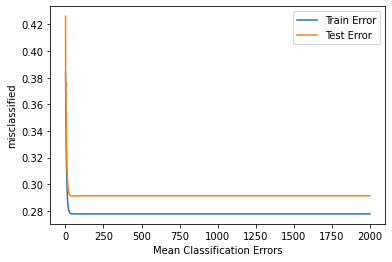

In [23]:
epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified, label="Train Error")
plt.plot(epochs, testError, label="Test Error")
#plt.plot(epochs, accuracy)
plt.xlabel('Mean Classification Errors')
plt.ylabel('misclassified')
plt.legend()
plt.show()

In [24]:
# Now we create a plot to show learned decision boundaries (find slope and intercept)
# The decision boundary line is W2.X2 + W1.X1+ W0=T (where T is threshold, 
# which is the middle point between positive and negative class)
# If positive is labled as 1, and negative is labled as -1. The middle point T
# So we have W2.X2 + W1.X1+ W0=T
# The line is X2=-(W1/W2).X1 + (T-W0)/W2
# Therefore the slope is -(W1/W2), and the y-intercept is - W0/W2
print(w)
slope=w[0,1]/w[0,2]*(-1)
intercept=(T-w[0,0])/w[0,2]
print(slope,intercept)

[[-0.22607298 -1.57509632  1.67012089]]
0.9431031831570705 0.13536324140543793


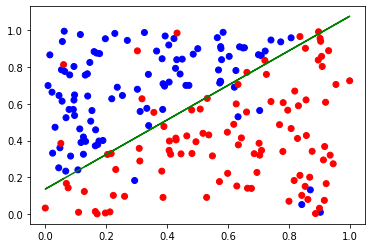

In [25]:
xvalues=class12.iloc[:,0]
yvalues=xvalues*slope+intercept
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx+1] for idx in class12.iloc[:,2]])
plt.plot(xvalues,yvalues,"g-")

In [13]:
# now we implement Delta rule leanring. Which use a signle instance to update the network weight value
import random
def Delta(features, labels, max_iter, learning_rate, err_threshold):
    
    # random initialize weight values between rage: [-0.5,0.5]
    w = np.random.rand(features.shape[1]+1)-0.5
    
    totalSquaredErr_ = []
    epoch=0
    err=9999.0
    while (epoch<max_iter) and (err>err_threshold):
        misclassified = 0
        deltaw=[0]*(features.shape[1]+1)
        # random select an instance
        i=random.randrange(features.shape[0])
        x=features[i,]
        x = np.insert(x,0,1)

        v = np.dot(w, x.transpose())
            
        diff = learning_rate*(labels[i] - v)
        deltaw=deltaw+diff*x
        
        #update weights
        #print(deltaw)
        w=w+deltaw
        
        # now calculate error using new weights
        this_err=0
        for i, x in enumerate(features):
            x = np.insert(x,0,1)
            v = np.dot(w, x.transpose())
            this_err=this_err+(labels[i] - v)*(labels[i] - v)
        this_err=np.asscalar(this_err)
        this_err=this_err/2.0
        totalSquaredErr_.append(this_err)
        #mean squared error
        err=this_err/features.shape[0]
        epoch=epoch+1
    return (w, totalSquaredErr_)

In [29]:
# we use maximum 500 iterations. Because delta rule only uses one instance to update, 
# we set learning rate to a small value
max_iter = 2000
eta=0.01
err_threshold=0.01
w, misclassified= Delta(X_train_m, y_train_m, max_iter, eta, err_threshold)
print(misclassified[0:10])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:34: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: Deprecation

[84.19524867342511, 83.73440148006362, 83.45917340021899, 83.21501057485278, 83.02470400125598, 82.7713655495974, 82.72684776892727, 82.66865379880447, 82.65123079610092, 82.52107389740152]


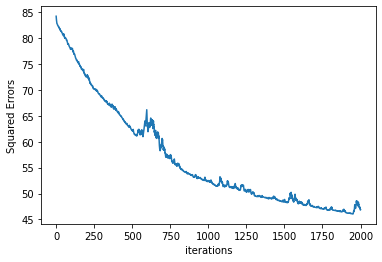

In [31]:
epochs = np.arange(1, max_iter+1)
plt.plot(epochs, misclassified)
plt.xlabel('iterations')
plt.ylabel('Squared Errors')
#plt.text(10,10,"Perceptron learning rule convergence")
plt.show()

In [16]:
# Now we create a plot to show learned decision boundaries (find slope and intercept)
print(w)
slope=w[0,1]/w[0,2]*(-1)
intercept=(T-w[0,0])/w[0,2]
print(slope,intercept)

[[-0.63807158 -1.21075683  1.44898829]]
0.8355877230735045 0.44035661443195384


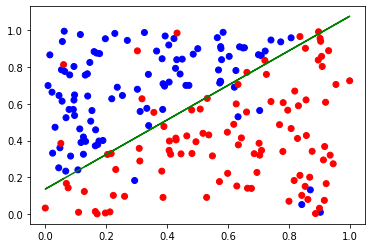

In [32]:
xvalues=class12.iloc[:,0]
yvalues=xvalues*slope+intercept
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx+1] for idx in class12.iloc[:,2]])
plt.plot(xvalues,yvalues,"g-")